### Project Description

The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades

Columns Description-  total 43 columns
-Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

 
Predict - CGPA of a student based on different grades in four years.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv')
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [4]:
# checking the null values
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

We can see that we have couples of null values. Regarding the fact that we have categorical data in those colums I will use 'ffill' method so my dataset wont be to different and my outcome wont be affected too much. And I will apply the method for the whole df because we have the same type and from the same cathegory they are all grades. 

In [5]:
df.fillna(method = 'ffill', inplace = True)
df.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [6]:
# Now that we fix the null values I will get rid of 'Seat No' wich is basicaly an index column. 
df.drop('Seat No.', axis = 1, inplace = True)

In [7]:
# Let's see our new df
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,A+,A,A,A,A,A,A,A-,A,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,B,A,A-,B+,A,A,A,A,A,B,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [8]:
df.shape

(571, 42)

In [9]:
# Checking number of unique values in each column 

df.nunique().to_frame('No of unique values')

,No of unique values
PH-121,13
HS-101,12
CY-105,13
HS-105/12,13
MT-111,13
CS-105,11
CS-106,13
EL-102,13
EE-119,12
ME-107,13


We have many different types of grades here. 

In [10]:
!pip install category_encoders

In [11]:
# encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE= OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,8.0,...,8.0,8.0,8.0,8.0,2.0,0.0,8.0,3.0,2.0,2.205
1,0.0,9.0,10.0,9.0,5.0,6.0,9.0,0.0,10.0,9.0,...,10.0,9.0,6.0,9.0,2.0,5.0,6.0,6.0,3.0,2.008
2,0.0,3.0,0.0,5.0,4.0,0.0,5.0,4.0,2.0,2.0,...,3.0,3.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0,3.608
3,9.0,7.0,10.0,9.0,9.0,2.0,10.0,8.0,9.0,7.0,...,10.0,6.0,10.0,8.0,5.0,3.0,7.0,7.0,7.0,1.906
4,2.0,2.0,2.0,4.0,0.0,0.0,2.0,4.0,0.0,2.0,...,5.0,4.0,4.0,5.0,2.0,0.0,2.0,2.0,0.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,4.0,...,2.0,2.0,0.0,0.0,0.0,4.0,4.0,3.0,0.0,3.798
567,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,4.0,4.0,0.0,0.0,2.0,3.0,2.0,6.0,2.0,3.772
568,3.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,...,2.0,3.0,0.0,4.0,0.0,6.0,4.0,2.0,2.0,3.470
569,0.0,4.0,9.0,0.0,9.0,10.0,5.0,8.0,5.0,8.0,...,9.0,3.0,3.0,8.0,9.0,6.0,3.0,5.0,6.0,2.193


In [12]:
df.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.00000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,3.781086,5.071804,2.908932,4.248687,3.908932,2.838879,4.134851,3.964974,3.90718,4.803853,...,4.150613,4.851138,3.553415,5.493870,3.250438,2.483363,3.900175,4.028021,3.285464,2.954888
std,3.046895,2.785317,2.965079,3.195580,2.989239,2.696709,2.726934,3.030633,2.67217,3.151728,...,3.367817,2.770885,3.009086,2.753858,2.576952,2.504239,2.404422,2.795846,2.447508,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,2.000000,3.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.00000,2.000000,...,1.000000,3.000000,1.000000,3.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.538000
50%,3.000000,5.000000,2.000000,4.000000,4.000000,2.000000,4.000000,3.000000,3.00000,5.000000,...,4.000000,5.000000,3.000000,5.000000,2.000000,2.000000,4.000000,4.000000,3.000000,3.029000
75%,6.000000,7.000000,5.000000,7.000000,6.000000,4.000000,5.500000,6.000000,6.00000,8.000000,...,7.000000,7.000000,5.000000,8.000000,4.000000,4.000000,5.000000,6.000000,4.000000,3.451000
max,12.000000,11.000000,12.000000,12.000000,12.000000,10.000000,12.000000,12.000000,11.00000,12.000000,...,13.000000,11.000000,10.000000,12.000000,13.000000,12.000000,11.000000,11.000000,12.000000,3.985000


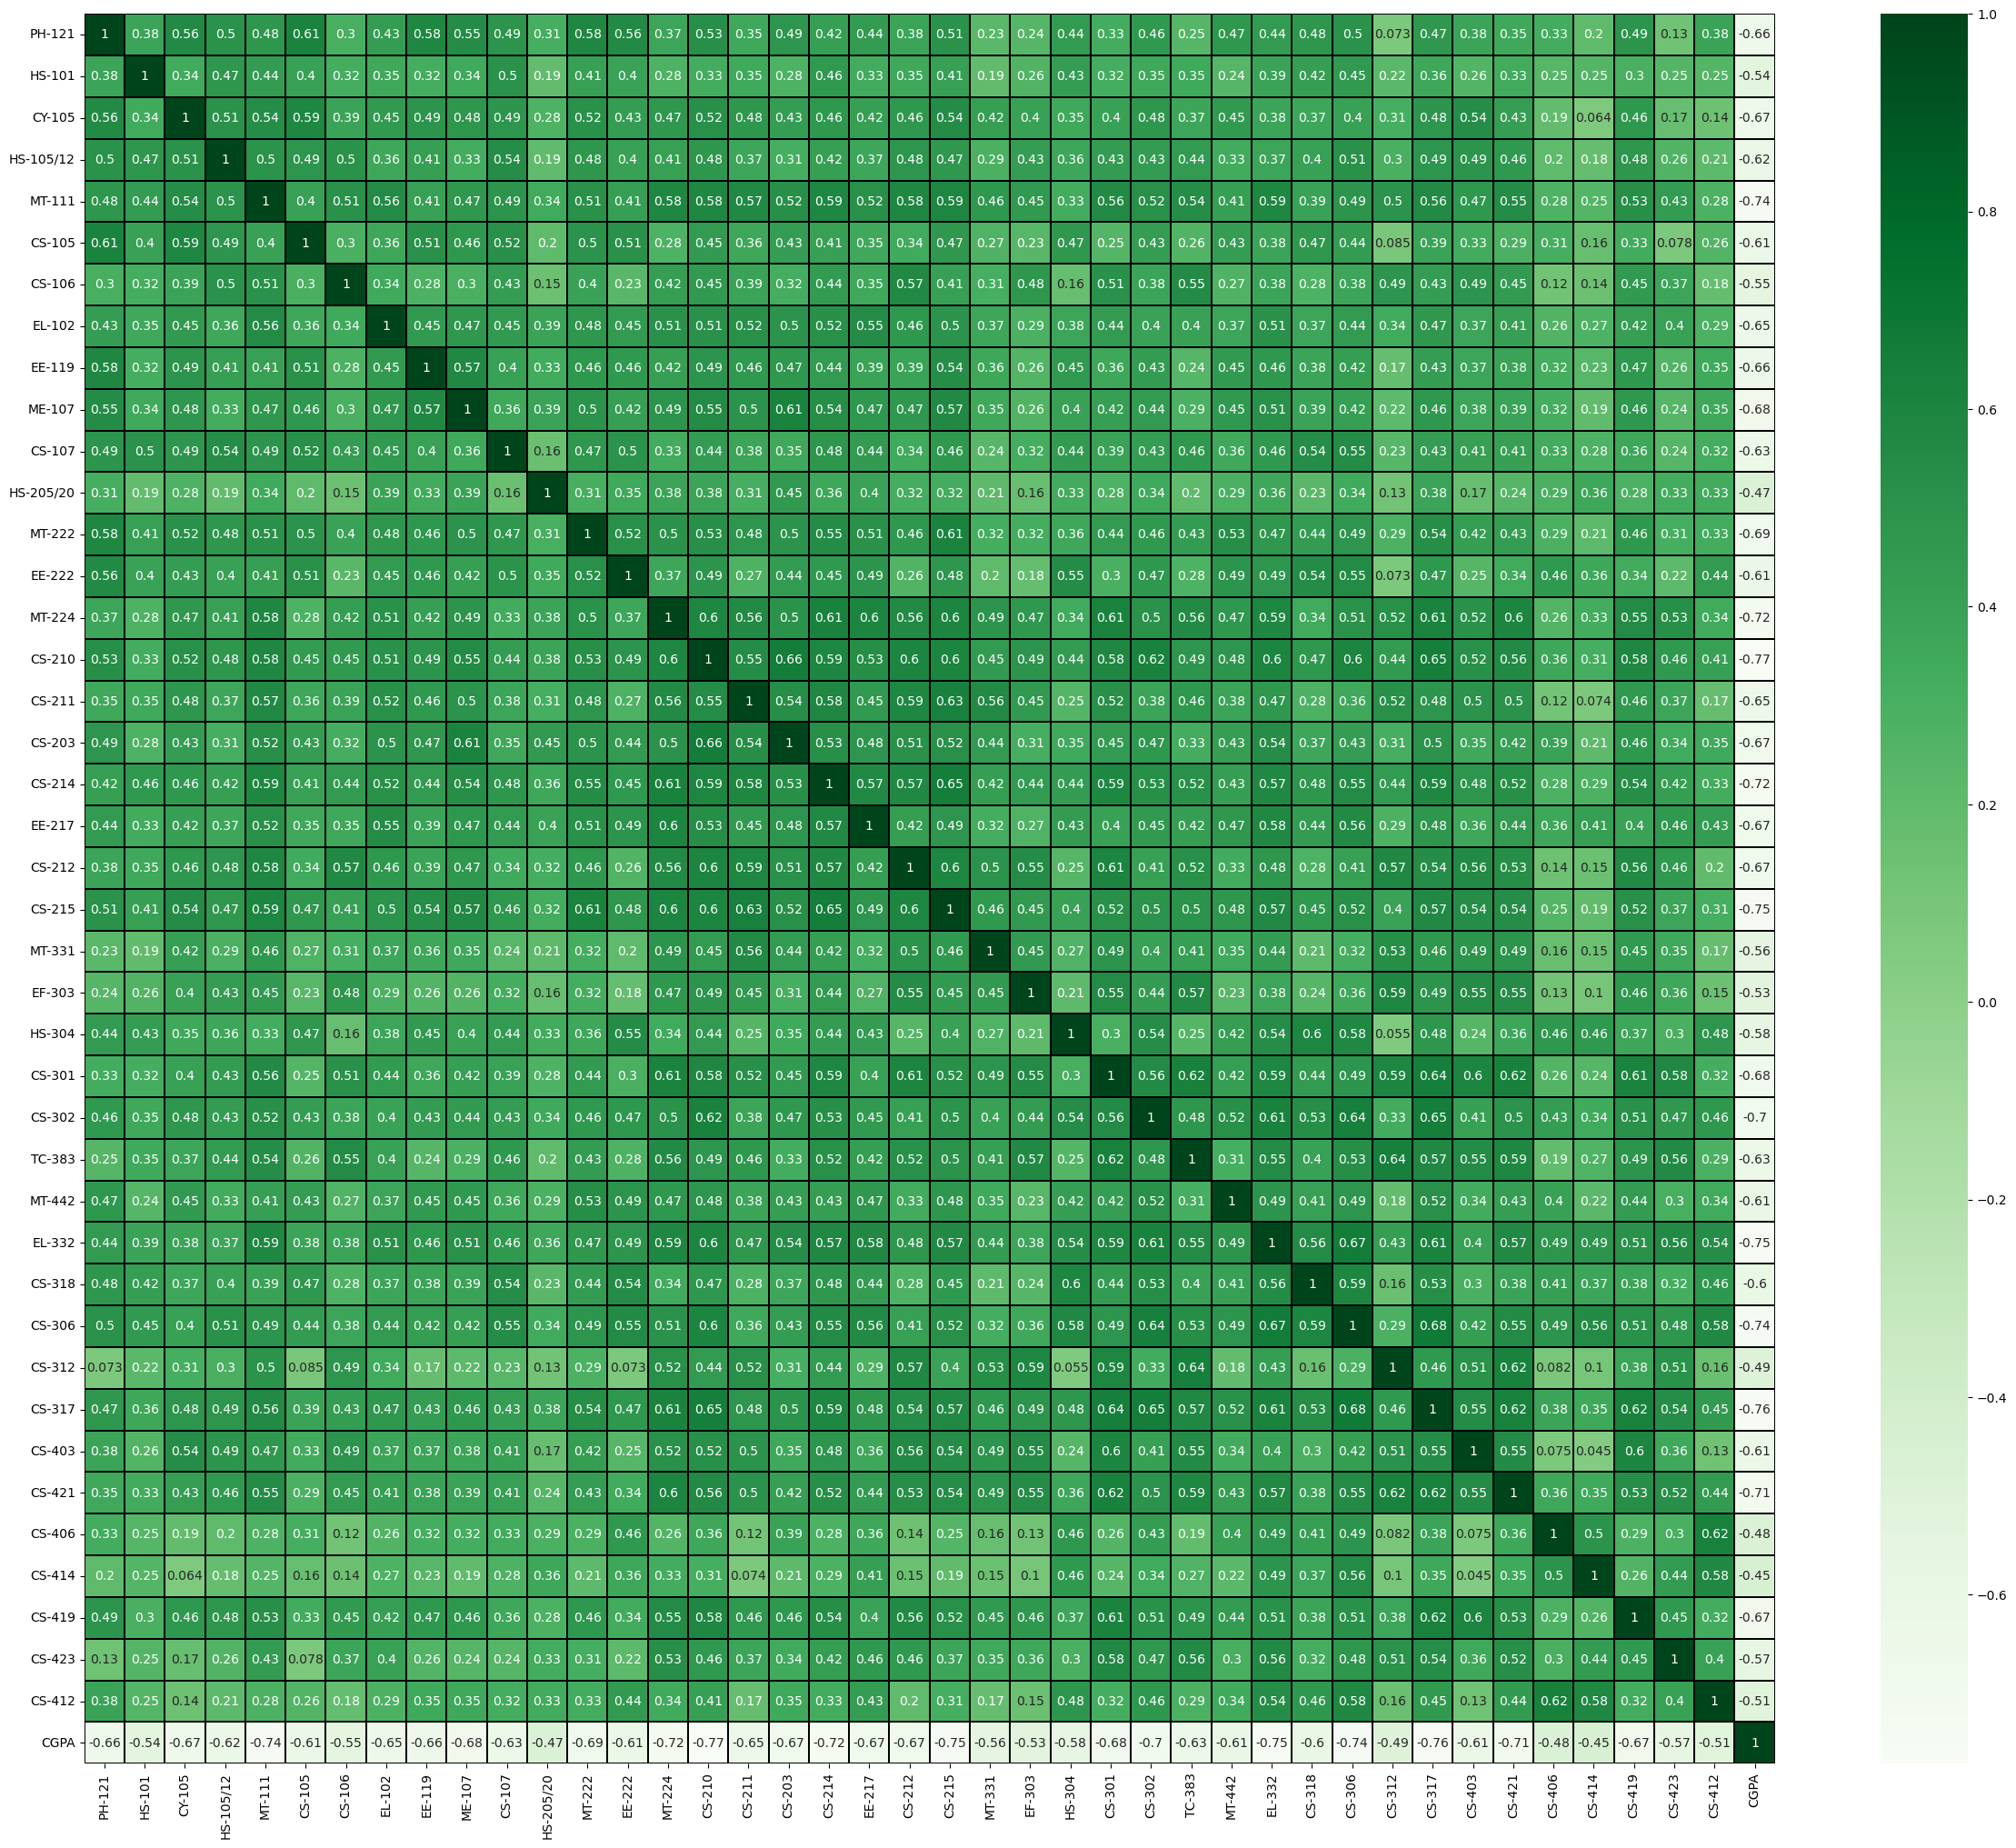

In [14]:
plt.figure(figsize=(30,25))
sns.heatmap(df.corr(), linewidths = 0.1, fmt = '.2g', linecolor = 'black', annot = True, cmap = 'Greens')
plt.yticks(rotation = 0);
plt.show()

We have a lot of columns. If we zoom in a bit we can see that most of the columns have a correlation above 50% with our target. Wich is very good. 

In [15]:
x = df.drop('CGPA', axis = 1)
y = df['CGPA']

In [16]:
print(x.shape)
print(y.shape)

(571, 41)
(571,)


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x # we use this so the model dont prioritize any feature and everyone have the same impact in the model. 

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,0.400402,1.770900,1.718515,0.548523,1.369798,2.657832,1.785674,1.332581,0.409322,1.014983,...,0.637929,1.143994,1.137407,1.479015,0.910841,-0.485665,-0.992533,1.706614,-0.368018,-0.525674
1,-1.242052,1.411559,2.393625,1.488143,0.365319,1.173242,1.785674,-1.309446,2.282101,1.332547,...,1.680650,1.738371,1.498619,0.813779,1.274286,-0.485665,1.005832,0.874084,0.705943,-0.116737
2,-1.242052,-0.744483,-0.981924,0.235316,0.030492,-1.053643,0.317539,0.011568,-0.714346,-0.890404,...,-0.752366,-0.341949,-0.668653,-1.181931,0.183950,-1.262456,-0.992533,-1.623506,-0.726005,-1.343548
3,1.714365,0.692879,2.393625,1.488143,1.704625,-0.311348,2.152708,1.332581,1.907545,0.697418,...,1.333076,1.738371,0.414983,2.144252,0.910841,0.679522,0.206486,1.290349,1.063930,1.519011
4,-0.585070,-1.103823,-0.306814,-0.077890,-1.308814,-1.053643,-0.783562,0.011568,-1.463457,-0.890404,...,-0.752366,0.252428,-0.307441,0.148542,-0.179495,-0.485665,-0.992533,-0.790976,-0.726005,-1.343548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,-0.256579,-1.822504,-0.981924,-0.704304,-0.973988,-1.053643,-0.783562,-0.648939,-1.088901,-0.255275,...,-0.057219,-0.639138,-1.029865,-1.181931,-1.996721,-1.262456,0.606159,0.041554,-0.368018,-1.343548
567,-0.913561,-1.822504,-0.981924,-1.330717,-1.308814,-1.053643,-1.517630,-0.648939,-1.463457,-1.525533,...,-0.752366,-0.044760,-0.307441,-1.181931,-1.996721,-0.485665,0.206486,-0.790976,0.705943,-0.525674
568,-0.256579,-1.822504,-0.306814,-0.077890,-1.308814,-1.053643,-1.517630,-1.309446,-1.463457,-0.572840,...,-0.057219,-0.639138,-0.668653,-1.181931,-0.542940,-1.262456,1.405505,0.041554,-0.726005,-0.525674
569,-1.242052,-0.385142,2.056070,-1.330717,1.704625,2.657832,0.317539,1.332581,0.409322,1.014983,...,-0.057219,1.441183,-0.668653,-0.184076,0.910841,2.233105,1.405505,-0.374711,0.347956,1.110074


In [18]:
#importing necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [19]:
# finding the best Random State 
maxAccu = 0
maxRS = 0
for i in range(0,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state = i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print('Max r2 score is ', maxAccu, ' on Random_state', maxRS)

Max r2 score is  0.9773335588607447  on Random_state 106


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = maxRS)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge

In [22]:
LR = LinearRegression()
LR.fit(x_train, y_train)
pred_LR = LR.predict(x_test)
pred_train = LR.predict(x_train)
print('R2_score:', r2_score(y_test, pred_LR)*100)
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:-', mean_absolute_error(y_test, pred_LR))
print('Mean Squared Error:-', mean_squared_error(y_test, pred_LR))
print('Root Mean Squared Error:-', np.sqrt(mean_squared_error(y_test, pred_LR)))


R2_score: 97.73335588607446
R2_score on training Data: 94.24234235881025
Mean Absolute Error:- 0.07089736055266482
Mean Squared Error:- 0.008185635272843916
Root Mean Squared Error:- 0.09047450067750534


In [23]:
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
pred_RFR = RFR.predict(x_test)
pred_train = RFR.predict(x_train)
print('R2_score:', r2_score(y_test, pred_RFR)*100)
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:-', mean_absolute_error(y_test, pred_RFR))
print('Mean Squared Error:-', mean_squared_error(y_test, pred_RFR))
print('Root Mean Squared Error:-', np.sqrt(mean_squared_error(y_test, pred_RFR)))


R2_score: 94.68311388234515
R2_score on training Data: 98.54043376175068
Mean Absolute Error:- 0.10284715116279056
Mean Squared Error:- 0.01920111334593019
Root Mean Squared Error:- 0.13856808198835036


In [24]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
pred_dtr = dtr.predict(x_test)
pred_train = dtr.predict(x_train)
print('R2_score:', r2_score(y_test, pred_dtr)*100)
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:-', mean_absolute_error(y_test, pred_dtr))
print('Mean Squared Error:-', mean_squared_error(y_test, pred_dtr))
print('Root Mean Squared Error:-', np.sqrt(mean_squared_error(y_test, pred_dtr)))


R2_score: 79.97075093712289
R2_score on training Data: 100.0
Mean Absolute Error:- 0.202296511627907
Mean Squared Error:- 0.07233254069767442
Root Mean Squared Error:- 0.2689470964663393


In [25]:
knn = KNN()
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)
pred_train = knn.predict(x_train)
print('R2_score:', r2_score(y_test, pred_knn))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:-', mean_absolute_error(y_test, pred_knn))
print('Mean Squared Error:-', mean_squared_error(y_test, pred_knn))
print('Root Mean Squared Error:-', np.sqrt(mean_squared_error(y_test, pred_knn)))


R2_score: 0.9626657354139153
R2_score on training Data: 93.08467740335897
Mean Absolute Error:- 0.09320813953488374
Mean Squared Error:- 0.013482693255813959
Root Mean Squared Error:- 0.11611500013268725


In [26]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train, y_train)
pred_GBR = GBR.predict(x_test)
pred_train = GBR.predict(x_train)
print('R2_score:', r2_score(y_test, pred_GBR))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:-', mean_absolute_error(y_test, pred_GBR))
print('Mean Squared Error:-', mean_squared_error(y_test, pred_GBR))
print('Root Mean Squared Error:-', np.sqrt(mean_squared_error(y_test, pred_GBR)))


R2_score: 0.9573274948016623
R2_score on training Data: 99.63958501193926
Mean Absolute Error:- 0.09841632714748488
Mean Squared Error:- 0.015410516436441478
Root Mean Squared Error:- 0.12413910115850475


In [27]:
lasso = Lasso()
lasso.fit(x_train, y_train)
pred_lasso = lasso.predict(x_test)
pred_train = lasso.predict(x_train)
print('R2_score:', r2_score(y_test, pred_lasso))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:-', mean_absolute_error(y_test, pred_lasso))
print('Mean Squared Error:-', mean_squared_error(y_test, pred_lasso))
print('Root Mean Squared Error:-', np.sqrt(mean_squared_error(y_test, pred_lasso)))


R2_score: -0.027014408484725694
R2_score on training Data: 0.0
Mean Absolute Error:- 0.5194748207728626
Mean Squared Error:- 0.37089039766600457
Root Mean Squared Error:- 0.6090077156046585


In [28]:
rd = Ridge()
rd.fit(x_train, y_train)
pred_rd = rd.predict(x_test)
pred_train = rd.predict(x_train)
print('R2_score:', r2_score(y_test, pred_rd))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:-', mean_absolute_error(y_test, pred_rd))
print('Mean Squared Error:-', mean_squared_error(y_test, pred_rd))
print('Root Mean Squared Error:-', np.sqrt(mean_squared_error(y_test, pred_rd)))


R2_score: 0.9775068533029585
R2_score on training Data: 94.24227638628051
Mean Absolute Error:- 0.07064045002685754
Mean Squared Error:- 0.008123052660511509
Root Mean Squared Error:- 0.09012797934332883


In [29]:
from sklearn.model_selection import GridSearchCV

param = {'alpha':[1.0,.05,.4,2], 
         'fit_intercept':[True, False],
        'solver':['auto','svd','cholesky','lsqr','sag','saga','lbfgs'],
        'positive':[False,True],
        'random_state':[1,4,10,20]}

gscv = GridSearchCV(Ridge(),param, cv=5)
gscv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05, 0.4, 2],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': [1, 4, 10, 20],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'saga', 'lbfgs']})

In [30]:
gscv.best_params_

{'alpha': 1.0,
 'fit_intercept': True,
 'positive': False,
 'random_state': 1,
 'solver': 'auto'}

In [31]:
Model = Ridge(alpha = 1.0, fit_intercept = True, positive = False, random_state= 1, solver = 'auto')

In [32]:
Model.fit(x_train, y_train)
pred=Model.predict(x_test)
print('R2_score:', r2_score(y_test,pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

R2_score: 0.9775068533029585
Mean Absolute Error: 0.07064045002685754
Mean Squared Error: 0.008123052660511509
Root Mean Squared Error: 0.09012797934332883


In [ ]:
input_data = ()

#changing it to numpy array
input_data_as_array = np.asarray(input_data)

#reshapping the data
input_data_reshaped = input_data_as_array.reshape(1,-1)

prediction = Model.predict(input_data_reshaped)

print("Our student grade will be",prediction[0])